# Very basics of linear modeling

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
# Read data
d = pd.read_csv('rh_data.csv')
d.head(5)

,id,work,gender,age,treatment,before,after
0,1,Stables,Male,16,garlic,113,58
1,2,Barracks,Male,28,garlic,137,83
2,3,Kitchen,Female,30,garlic,73,39
3,4,Stables,Male,27,garlic,156,90
4,5,Barracks,Male,10,garlic,70,22


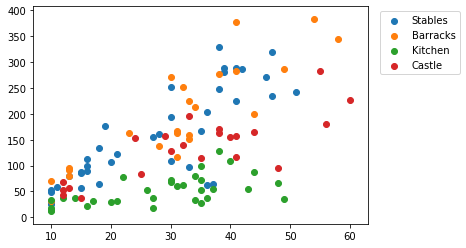

In [3]:
ax = plt.axes()
for w in d.work.unique():
    ax = plt.scatter(d[d.work==w].age, d[d.work==w].before, label=w)
plt.legend(bbox_to_anchor=(1.02,1), loc='upper left'); # First set a box, then position the legend within this box

In [4]:
pd.get_dummies(d).head(4)
# drop_first=True is an option, but makes interpretation harder, right?

,id,age,before,after,work_Barracks,work_Castle,work_Kitchen,work_Stables,gender_Female,gender_Male,treatment_garlic,treatment_silver
0,1,16,113,58,0,0,0,1,0,1,1,0
1,2,28,137,83,1,0,0,0,0,1,1,0
2,3,30,73,39,0,0,1,0,1,0,1,0
3,4,27,156,90,0,0,0,1,0,1,1,0


In [5]:
dd = pd.get_dummies(d)
col_names  = list(dd.columns)
rm_names = ['id','before','after']
col_names = [a for a in dd if a not in rm_names] # Filter using list comprehension?

In [6]:
model = LinearRegression()
model.fit(dd[col_names].values , dd[['before']].values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
model.intercept_

array([8.6326095])

In [13]:
# Fit coefficicents:
pd.DataFrame(model.coef_.transpose() , col_names)

,0
age,4.289491
work_Barracks,65.892921
work_Castle,-21.428896
work_Kitchen,-81.464821
work_Stables,37.000797
gender_Female,13.220276
gender_Male,-13.220276
treatment_garlic,8.225804
treatment_silver,-8.225804


In [9]:
guess = model.predict(dd[col_names].values)

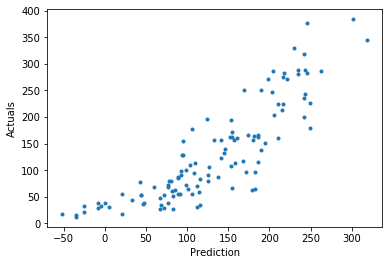

In [10]:
plt.plot(guess,d[['before']],'.')
plt.xlabel('Prediction')
plt.ylabel('Actuals');

In [11]:
# RMS on the full set:
print('RMS: ',np.sqrt(metrics.mean_squared_error(guess, d[['before']].values)))

RMS:  46.64837239652504


In [59]:
# Manual cross-validation with random splitting

scores = []
for i in range(10):
    # The way train_test_split works is that first few params don't have to named; it will just split all of them.
    (xtrain,xtest,ytrain,ytest) = train_test_split(dd[col_names].values , dd[['before']].values,
                                              test_size=0.2)
    model = LinearRegression()
    model.fit(xtrain,ytrain)
    guess = model.predict(xtest)
    scores.append(np.sqrt(metrics.mean_squared_error(guess, ytest)))
    
#plt.scatter([1]*len(bag),bag);
print(f'{np.mean(scores):.2f} pm {np.std(scores):.2f}')

43.65 pm 4.45


In [63]:
# Proper cross-validation
model = LinearRegression()

# k-fold:
scores = cross_val_score(model, dd[col_names].values, dd[['before']].values, cv=10, scoring='neg_mean_squared_error')
scores = np.sqrt(-scores) # Because now MSE is returned as a negative value
print(f'K-fold: {np.mean(scores):.2f} pm {np.std(scores):.2f}')

# Leave one out:
# (obviously STD doesn't make any sense in this case, as with only 1 testing point it is astronomical)
scores = cross_val_score(model, dd[col_names].values, dd[['before']].values, cv=len(dd), scoring='neg_mean_squared_error')
scores = np.sqrt(-scores) # Because now MSE is returned as a negative value
print(f'Leave-one-out: {np.mean(scores):.2f} pm {np.std(scores):.2f}')

K-fold: 50.48 pm 9.47
Leave-one-out: 39.42 pm 30.26
